# Intro

This notebook explains what I've done this far. If you've not used a jupyter notebook, it's useful for collaboration. All my code is here, which you can run/modify...though please note where you change code. I'm sure there is a track changes function or version control, but I don't know. Just click on the code block and hit run.

In [117]:
rm(list=ls())
library(dplyr)
library(tidyr)
library(ggplot2)
library(rlist)
library(psych)
library(lavaan)
data<-read.csv("/Users/chrisweber/research/abs/data/abs.csv")
data<-subset(data, country!=15)
print("The dimension of the data is")
dim(data)


[1] "The dimension of the data is"


[1] 18178   308

# Data

Below is how the data are assembled. Mai, perhaps you could update Tables 1-2, which should display the question wording and descriptive statistics. You can match the items to the codebook from "dat" below. 

In [118]:
library(dplyr)
library(tidyverse)
dat<-data.frame(ID=seq(1:length(data$q159)))
dat=suppressWarnings(dat %>% 
                       # mutate(red1=recode(data$q159, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       mutate(red1=recode(data$q160a, `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(red2=recode(data$q160b, `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(red3=recode(data$q160c, `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(red4=recode(data$q160d, `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       # mutate(red6=recode(data$q161, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(red7=recode(data$q162, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5, `6`=6)) %>%
                       # mutate(red8=recode(data$q163,`1`=1, `2`=2, `3`=3, `4`=4, `5`=5, `6`=6)) %>%
                       # mutate(red9=recode(data$q164,`1`=1, `2`=2, `3`=3, `4`=4, `5`=5))%>%
                       # mutate(red19=recode(data$q165,`1`=1, `2`=2, `3`=3, `4`=4, `5`=5))%>%
                       mutate(glob1=recode(data$q156, `1`=1, `2`=2)) %>%
                       mutate(glob1a=recode(data$q156a, `1`=1, `2`=2)) %>%
                       mutate(glob2=recode(data$q157, `1`=1, `2`=2)) %>%
                       mutate(glob2a=recode(data$q157a, `1`=1, `2`=2)) %>%
                       mutate(glob3=recode(data$q158, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       mutate(a1=recode(data$q146,  `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(a2=recode(data$q147,  `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(a3=recode(data$q148,  `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(a4=recode(data$q149,  `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(a5=recode(data$q150,  `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(a6=recode(data$q151,  `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(a7=recode(data$q152,  `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(a8=recode(data$q153,  `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(a9=recode(data$q154,  `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(a10=recode(data$q155,  `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       mutate(nat1=recode(data$q166, `1`=4, `2`=3, `3`=2, `4`=1)) %>%
                       #mutate(nat2=recode(data$q167, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       #mutate(dem1=recode(data$q132, `1`=1, `2`=3, `3`=2)) %>%
                       #mutate(dem2=recode(data$q133, `1`=1, `2`=2)) %>%
                       #mutate(dem3=recode(data$q134, `1`=4, `2`=2, `3`=4, `4`=5, `5`=3)) %>%
                       #mutate(dem4=recode(data$q135, `1`=1, `2`=2, `3`=4, `4`=5, `5`=3)) %>%
                       #mutate(dem5=recode(data$q136,`1`=1, `2`=2, `3`=3, `4`=4 )) %>%
                       mutate(dem6=recode(data$q137,`1`=1, `2`=2, `3`=3, `4`=4 )) %>%
                       mutate(dem7=recode(data$q138,`1`=1, `2`=2, `3`=3, `4`=4 )) %>%
                       mutate(dem8=recode(data$q139,`1`=1, `2`=2, `3`=3, `4`=4 )) %>%
                       mutate(dem9=recode(data$q140,`1`=1, `2`=2, `3`=3, `4`=4 )) %>%
                       # mutate(m1=recode(data$q58, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m2=recode(data$q59, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m3=recode(data$q60, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m4=recode(data$q61, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m5=recode(data$q62, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m6=recode(data$q63, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m7=recode(data$q64, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m8=recode(data$q65, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m9=recode(data$q66, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m10=recode(data$q67, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m11=recode(data$q68, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(m12=recode(data$q69, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(reg1=recode(data$q82, `1`=1, `2`=2)) %>%
                       # mutate(reg2=recode(data$q84, `1`=1, `2`=2)) %>%
                       # mutate(reg3=recode(data$q85, `1`=1, `2`=2)) %>%
                       # mutate(reg4=recode(data$q86, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(reg5=recode(data$q87, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(reg6=recode(data$q88, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(reg7=recode(data$q89, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       # mutate(reg8=recode(data$q90, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
                       mutate(country=data$country) %>%
                       mutate(country_label=recode(data$country, `1`="Japan", `3`="Korea", `5`="Mongolia", `6`="Philippines",
                                                   `7`="Taiwan", `8`="Thailand", `9`="Indonesia", `11`="Vietnam",
                                                   `13`="Malaysia", `14`="Myanmar", `18`="India")) %>%
                       mutate(numcode=as.factor(data$country)))
  
dat$global1<-ifelse(dat$glob1==1 & dat$glob1a==1, 4, NA)
dat$global1<-ifelse(dat$glob1==1 & dat$glob1a==2, 3, dat$glob1a)
dat$global1<-ifelse(dat$glob1==2 & dat$glob1a==1, 1, dat$glob1a)
dat$global1<-ifelse(dat$glob1==2 & dat$glob1a==2, 2, dat$glob1a)

dat$global2<-ifelse(dat$glob2==1 & dat$glob2a==1, 4, NA)
dat$global2<-ifelse(dat$glob2==1 & dat$glob2a==2, 3, dat$glob2a)
dat$global2<-ifelse(dat$glob2==2 & dat$glob2a==1, 1, dat$glob2a)
dat$global2<-ifelse(dat$glob2==2 & dat$glob2a==2, 2, dat$glob2a)

suppressWarnings(describe(dat))



,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ID,1,18178,9089.500000,5247.6809322,9089.5,9089.500000,6737.6757,1,18178,18177,0.000000000,-1.2001980,38.921930408
red1,2,17252,3.029852,0.9080255,3.0,3.106869,1.4826,1,4,3,-0.504736047,-0.7437830,0.006913187
red2,3,17308,2.974463,0.9395157,3.0,3.053148,1.4826,1,4,3,-0.441656361,-0.8705337,0.007141355
red3,4,17414,3.267888,0.8412533,3.0,3.372021,1.4826,1,4,3,-0.837373966,-0.2831428,0.006374960
red4,5,17344,3.038918,0.9442369,3.0,3.125396,1.4826,1,4,3,-0.515115983,-0.8748758,0.007169788
glob1,6,16168,1.289461,0.4535261,1.0,1.236858,0.0000,1,2,1,0.928397824,-1.1381479,0.003566762
glob1a,7,16158,1.509964,0.4999162,2.0,1.512454,0.0000,1,2,1,-0.039860634,-1.9985348,0.003932814
glob2,8,16179,1.282341,0.4501524,1.0,1.227964,0.0000,1,2,1,0.966984610,-1.0650066,0.003539026
glob2a,9,16145,1.497863,0.5000109,1.0,1.497329,0.0000,1,2,1,0.008546822,-2.0000508,0.003935142
glob3,10,16055,2.596450,0.9093180,3.0,2.620553,1.4826,1,4,3,-0.217473953,-0.7407741,0.007176466


# Parallel Analysis

As a first cut at exploring the latent structure of ideology in these data, we conduct an exploratory factor analysis (EFA) using the the policy items described in Tables 1-2. Figure 1 presents a plot of eigenvalues using both principled components and principled factor analysis. The "scree plot" clearly shows that 3-5 factors emerge from the data, depending upon the country in question. Each value corresponds to the percentage of the variance in the observed data explained by the particular eigenvalue shown in the "True" data, indicated in purple. Adding additional factors explains some, but not variation. The shape of the line indicates that 3 factors generally explain the largest share of the variance, followed with 1-2 additional factors.One can determine how many factors to retain by the conventional criteria that principled components with a score greater than 1 be obtained; for principle factors, scores greater than 0 should be obtained. In addition, one can make examine the elbow in the plot, where the marginal return in the variance explained by adding another factor is minimized. As an an additional test, the plot includes a parallel analysis, where data are simulated $K=1000$ times based on the observed correlation matrix of variables\footnote{Here, we use the polychoric correlation matrix, due to the categorical nature of our data .Generally one should prefer a factor solution in which the true eigenvalues exceed the simulated and resampled values (Horn 1965; Ledsma and Valero-Mora 2007; O'Connor 2000). That is, one should then retain the number of observed eigenvalues if they are greater than the simulated eigenvalues. 

Below is the count for each country. I ended up just putting each constituent "cleaned" dataset in a list of length 11. Each list element is the data frame for each country.

In [119]:

d.list<-list()
for(ii in unique(dat$country)){
  require(rlist)
  d<-subset(dat, country==ii)
  d.list<-list.append(d.list, d)
}


names(d.list)<-unique(dat$country_label)
require(psych)
print("The data dimensions by country")
lapply(d.list, dim)


[1] "The data dimensions by country"


$Japan
[1] 1045   30

$Korea
[1] 1268   30

$Mongolia
[1] 1284   30

$Philippines
[1] 1200   30

$Taiwan
[1] 1259   30

$Thailand
[1] 1200   30

$Vietnam
[1] 1200   30

$Malaysia
[1] 1237   30

$Indonesia
[1] 1540   30

$Myanmar
[1] 1627   30

$India
[1] 5318   30

Below is the parallel analysis. It runs the analysis in each state

In [120]:
p.dat<-data.frame()
for(ii in 1:11){
  my.dat<-d.list[[ii]] %>%
    na.omit() %>%
    subset(select=c(paste0("a", 1:9),
                    paste0("red", 1:4),
                    paste0("dem", 6:9)
                    )) 
  print(unique(d.list[[ii]]$country_label))
  png()
  p.analysis<-fa.parallel(my.dat, n.iter=100)
  dev.off()
 plot.dat<-with(p.analysis, data.frame(sim=fa.sim, eigenvalues=fa.values,
                                        rep=fa.simr, factors=c(1:length(fa.values))))
  plot.dat$country<-unique(d.list[[ii]]$country_label)
  p.dat<-rbind(p.dat, plot.dat)
}

      


[1] "Japan"
Parallel analysis suggests that the number of factors =  4  and the number of components =  3 
[1] "Korea"
Parallel analysis suggests that the number of factors =  3  and the number of components =  3 
[1] "Mongolia"
Parallel analysis suggests that the number of factors =  5  and the number of components =  3 
[1] "Philippines"
Parallel analysis suggests that the number of factors =  5  and the number of components =  3 
[1] "Taiwan"
Parallel analysis suggests that the number of factors =  5  and the number of components =  3 
[1] "Thailand"
Parallel analysis suggests that the number of factors =  6  and the number of components =  4 
[1] "Vietnam"
Parallel analysis suggests that the number of factors =  5  and the number of components =  3 
[1] "Malaysia"
Parallel analysis suggests that the number of factors =  5  and the number of components =  4 
[1] "Indonesia"
Parallel analysis suggests that the number of factors =  4  and the number of components =  4 
[1] "Myanmar"
P

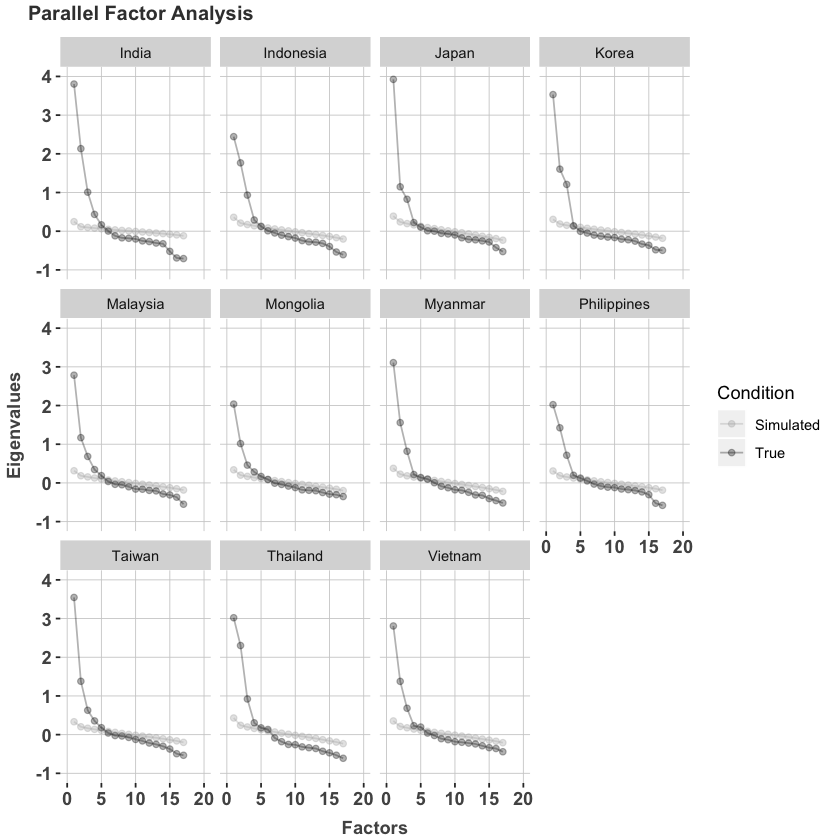

In [121]:
gplot<-data.frame(eigenvalues=c(p.dat$sim,  p.dat$eigenvalues, p.dat$rep),
                  condition=rep(c("Simulated", "True", "Resampled"), each=length(p.dat$eigenvalues)),
                  factor=rep(c(1:17), times=3),
                  country=rep(p.dat$country,  times=3)
                    )
gplot<-subset(gplot, condition!="Resampled")

 p1<-ggplot(gplot, aes(x=factor, y=eigenvalues,
                         group=condition,
                         colour=condition)) +
   facet_wrap(~country)+
   geom_point(alpha=0.3, aes(x=factor, y=eigenvalues,
                             colour=condition))+
   geom_line(alpha=0.3)+
   scale_colour_manual(name="Condition", values=c("darkgrey", "black"))+
   ggtitle("Parallel Factor Analysis")+
   theme(panel.background=element_rect(fill="white")) +
   theme(plot.background=element_rect(fill="white")) +
   # Format the grid
   theme(panel.grid.major=element_line(colour="#D0D0D0",size=.25)) +
   theme(plot.title=element_text(face="bold",hjust=-.08,vjust=2,colour="#3C3C3C",size=12)) +
   theme(axis.text.x=element_text(size=11,colour="#535353",face="bold")) +
   theme(axis.text.y=element_text(size=11,colour="#535353",face="bold")) +
   theme(axis.title.y=element_text(size=11,colour="#535353",face="bold",vjust=1.5)) +
   theme(axis.title.x=element_text(size=11,colour="#535353",face="bold",vjust=-.5))+
   scale_x_continuous("Factors", limits=c(0,20))+
   scale_y_continuous("Eigenvalues", limits=c(-1,4))
p1



# Exploratory Factor Analysis Results

The parallel analysis suggestions a 4-6 factor solution. It is important to note that EFA is a data driven method that rarely provides a decisive solution regarding the underlying factor structure; instead, it provides useful hints as to the number of factors to retain. We ultimately adopt a four factor model, which we present in the text, and present the five and six factor model in the appendix. 

The reason we settle on a four factor solution is primarily practical: The EFA identifies several factors that are primarily defined by only two items. Since we are unable to reliably estimate latent factor scores -- a goal in this paper -- we opted to simplify the analysis by reporting a four factor model. As the reader will see, the four factor model provides a very good fit-to-data and is a relatively parsimonious solution.  

Below I report the different factor solutions, some of which can go in an appendix. I don't think the 4-6 factor models provide much useful information. Some of the constructs split apart, but it doesn't seem terribly meaningful and adds  complexity. The three factor model looks pretty good.

In [122]:
p.dat2<-data.frame()
for(ii in 1:11){
  plot.dat<-d.list[[ii]] %>%
    na.omit() %>%
    subset(select=c(paste0("a", 1:9),
                    paste0("red", 1:4),
                    paste0("dem", 6:9)
    )) 
  p.dat2<-rbind(p.dat2, plot.dat)
}
p.analysis<-fa(p.dat2, nfactors=3, cor="polychoric")
print("The three factor model:")
p.analysis


p.analysis<-fa(p.dat2, nfactors=4, cor="polychoric")
print("The four factor model:")
p.analysis

p.analysis<-fa(p.dat2, nfactors=5, cor="polychoric")
print("The five factor model:")
p.analysis


p.analysis<-fa(p.dat2, nfactors=6, cor="polychoric")
print("The six factor model:")
p.analysis





[1] "The three factor model:"


Factor Analysis using method =  minres
Call: fa(r = p.dat2, nfactors = 3, cor = "polychoric")
Standardized loadings (pattern matrix) based upon correlation matrix
       MR1   MR2   MR3   h2   u2 com
a1   -0.33 -0.05  0.23 0.23 0.77 1.8
a2   -0.16 -0.04  0.45 0.30 0.70 1.3
a3    0.17 -0.02  0.43 0.14 0.86 1.3
a4   -0.10  0.13  0.51 0.38 0.62 1.2
a5   -0.08  0.07  0.56 0.39 0.61 1.1
a6    0.13 -0.02  0.66 0.36 0.64 1.1
a7   -0.08 -0.04  0.58 0.38 0.62 1.0
a8   -0.04 -0.04  0.55 0.32 0.68 1.0
a9   -0.07  0.08  0.52 0.35 0.65 1.1
red1 -0.09  0.70 -0.05 0.50 0.50 1.0
red2 -0.04  0.82  0.01 0.69 0.31 1.0
red3  0.11  0.81  0.02 0.66 0.34 1.0
red4  0.00  0.76  0.02 0.59 0.41 1.0
dem6  0.77 -0.05  0.02 0.59 0.41 1.0
dem7  0.80  0.04 -0.02 0.66 0.34 1.0
dem8  0.69  0.00 -0.10 0.55 0.45 1.0
dem9  0.80  0.00  0.02 0.62 0.38 1.0

                       MR1  MR2  MR3
SS loadings           2.71 2.47 2.50
Proportion Var        0.16 0.15 0.15
Cumulative Var        0.16 0.30 0.45
Proportion Explained  

[1] "The four factor model:"


Factor Analysis using method =  minres
Call: fa(r = p.dat2, nfactors = 4, cor = "polychoric")
Standardized loadings (pattern matrix) based upon correlation matrix
       MR1   MR2   MR3   MR4   h2   u2 com
a1   -0.28 -0.02  0.03  0.33 0.27 0.73 2.0
a2   -0.01  0.01  0.05  0.85 0.77 0.23 1.0
a3    0.17 -0.02  0.39  0.07 0.14 0.86 1.4
a4   -0.11  0.13  0.45  0.10 0.37 0.63 1.4
a5   -0.10  0.07  0.51  0.08 0.39 0.61 1.2
a6    0.11 -0.03  0.65  0.02 0.37 0.63 1.1
a7   -0.08 -0.03  0.48  0.17 0.37 0.63 1.3
a8   -0.06 -0.05  0.56  0.00 0.34 0.66 1.0
a9   -0.11  0.06  0.59 -0.08 0.40 0.60 1.1
red1 -0.10  0.70 -0.01 -0.06 0.50 0.50 1.1
red2 -0.03  0.83 -0.02  0.05 0.70 0.30 1.0
red3  0.09  0.80  0.08 -0.10 0.66 0.34 1.1
red4  0.02  0.78 -0.04  0.11 0.61 0.39 1.0
dem6  0.79 -0.04 -0.03  0.07 0.62 0.38 1.0
dem7  0.78  0.03  0.01 -0.08 0.65 0.35 1.0
dem8  0.66 -0.01 -0.01 -0.16 0.55 0.45 1.1
dem9  0.81  0.02 -0.04  0.07 0.65 0.35 1.0

                       MR1  MR2  MR3  MR4
SS loadings         

[1] "The five factor model:"


Factor Analysis using method =  minres
Call: fa(r = p.dat2, nfactors = 5, cor = "polychoric")
Standardized loadings (pattern matrix) based upon correlation matrix
       MR1   MR2   MR3   MR5   MR4   h2   u2 com
a1   -0.24 -0.06 -0.10  0.21  0.33 0.30 0.70 2.9
a2   -0.01  0.02  0.05  0.05  0.82 0.74 0.26 1.0
a3    0.14  0.00  0.32  0.09  0.08 0.14 0.86 1.7
a4   -0.01  0.03  0.02  0.71  0.06 0.57 0.43 1.0
a5   -0.05  0.02  0.19  0.48  0.06 0.44 0.56 1.4
a6    0.07  0.00  0.51  0.18  0.03 0.37 0.63 1.3
a7   -0.12  0.02  0.50 -0.02  0.19 0.42 0.58 1.4
a8   -0.12  0.00  0.56  0.01  0.01 0.39 0.61 1.1
a9   -0.12  0.06  0.39  0.27 -0.08 0.39 0.61 2.2
red1 -0.09  0.68 -0.06  0.07 -0.07 0.50 0.50 1.1
red2 -0.02  0.81 -0.07  0.08  0.04 0.69 0.31 1.0
red3  0.06  0.82  0.10 -0.03 -0.10 0.67 0.33 1.1
red4  0.00  0.79  0.01 -0.07  0.11 0.62 0.38 1.1
dem6  0.78 -0.03  0.03 -0.09  0.08 0.62 0.38 1.1
dem7  0.79  0.02 -0.02  0.04 -0.08 0.66 0.34 1.0
dem8  0.66 -0.02 -0.04  0.02 -0.16 0.56 0.44 1.1
dem9

[1] "The six factor model:"


Factor Analysis using method =  minres
Call: fa(r = p.dat2, nfactors = 6, cor = "polychoric")
Standardized loadings (pattern matrix) based upon correlation matrix
       MR2   MR1   MR3   MR4   MR5   MR6   h2     u2 com
a1   -0.06 -0.25 -0.06  0.27  0.20 -0.03 0.27 0.7282 3.1
a2    0.01  0.00  0.00  1.00  0.00  0.02 1.00 0.0043 1.0
a3    0.01  0.08  0.30  0.16  0.00  0.30 0.21 0.7880 2.6
a4    0.01  0.02  0.00  0.01  0.82 -0.01 0.68 0.3247 1.0
a5    0.03 -0.08  0.22  0.06  0.42  0.09 0.42 0.5830 1.8
a6    0.01  0.04  0.51  0.06  0.12  0.19 0.38 0.6155 1.4
a7    0.01 -0.07  0.56  0.11  0.02 -0.14 0.46 0.5408 1.2
a8    0.00 -0.10  0.57 -0.01  0.02  0.00 0.38 0.6167 1.1
a9    0.07 -0.10  0.40 -0.08  0.27  0.00 0.38 0.6170 2.0
red1  0.68 -0.10 -0.06 -0.04  0.06  0.04 0.49 0.5054 1.1
red2  0.80 -0.04 -0.07  0.05  0.07  0.02 0.68 0.3177 1.0
red3  0.83  0.03  0.07 -0.04 -0.07  0.14 0.69 0.3075 1.1
red4  0.80  0.05  0.03  0.04  0.00 -0.20 0.68 0.3216 1.1
dem6 -0.04  0.85  0.05  0.01 -0.03 -0.1

# Confirmatory Factor Analysis

It can be really hard to make sense of EFA results. I don't use it much -- it's not a very useful technique, in my opinion. One often gets factors that aren't meaninful, defined by how questions are asked or general "methods" factors. There's also the rotational issues, since so many parameters are estimated. Below I simply show how different models fit the data

In [110]:
three.model <- '  redistribution  =~ red1 + red2 + red3 + red4 
                 authpolicy  =~  a1 + a2 + a3 + a4 + a5 + a6 + a7 + a8 + a9
                 democracy   =~ dem6 + dem7 + dem8 + dem9 '
fit <- cfa(three.model, 
            ordered=c("red1", "red2", "red3",
                       "red4", 
                       "a1", "a2",
                       "a3", "a4", "a5", 
                       "a6", "a7", "a8", "a9",
                       "dem6", "dem7", 
                       "dem8", "dem9"),  data=p.dat2)
summary(fit, fit.measures=TRUE)


lavaan 0.6-3 ended normally after 34 iterations

  Optimization method                           NLMINB
  Number of free parameters                         71

  Number of observations                         11809

  Estimator                                       DWLS      Robust
  Model Fit Test Statistic                    5452.587    6384.889
  Degrees of freedom                               116         116
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  0.857
  Shift parameter                                           24.898
    for simple second-order correction (Mplus variant)

Model test baseline model:

  Minimum Function Test Statistic           214397.654  114362.729
  Degrees of freedom                               136         136
  P-value                                        0.000       0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.975       

As you can see, the fit is quite good. The CFI and TLI measures exceed 0.9 and the RMSEA measures are under 0.10. Here is a more complex four factor model. We shouldn't use this -- one factor is defined by only two items. Plus, it only provides a marginally better fit.

In [112]:
four.model <- '  redistribution  =~ red1 + red2 + red3 + red4 
                 authpolicy1  =~  a1 + a2 
                 authpolicy2  =~ a3 + a4 + a5 + a6 + a7 + a8 + a9
                 democracy   =~ dem6 + dem7 + dem8 + dem9 '
fit <- cfa(four.model, 
            ordered=c("red1", "red2", "red3",
                       "red4", 
                       "a1", "a2",
                       "a3", "a4", "a5", 
                       "a6", "a7", "a8", "a9",
                       "dem6", "dem7", 
                       "dem8", "dem9"),  data=p.dat2)
summary(fit, fit.measures=TRUE)

lavaan 0.6-3 ended normally after 45 iterations

  Optimization method                           NLMINB
  Number of free parameters                         74

  Number of observations                         11809

  Estimator                                       DWLS      Robust
  Model Fit Test Statistic                    3994.138    4910.459
  Degrees of freedom                               113         113
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  0.817
  Shift parameter                                           23.212
    for simple second-order correction (Mplus variant)

Model test baseline model:

  Minimum Function Test Statistic           214397.654  114362.729
  Degrees of freedom                               136         136
  P-value                                        0.000       0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.982       

# Summary

I still need to do more, but I need to work on a few other things first. Eventually, I'll run a more complicated model three factor model, but this should be sufficient to start. We'll need to settle on what to present, but I think it's reasonable to talk through why these three factors matter and what we should expect across these countries. We should probably divide up the labor, since I believe we can probably start writing and putting figures/tables together.